# Interactive content: Elements not including Python

To add interactivity to the book, you can make use of interactive elements which are embedded in the book. You've four options:

 - Admonition: question provided in normal markdown language with answers in a drowdown menu. There's no feedback delivered to the student, only the correct answer no matter what the student's thinking/work.
 - JupyterQuiz: code-based implementation of multiple-choiche questions and numerical answer questions. This is a basic open course tool which requires you to write your quiz questions in Python language as a `dict` or to a `.json` file.
 - H5p: TU-Delft-licensed tool to create questions (and many other interactive elements) using an [online GUI](https://tudelft.h5p.com/). These elements are embedded into the book using an iframe which requires very little coding. This elements are easier to implement than the JupyterQuiz and have more features (although proper numerical answer questions are missing). More information on this is provided in [this subchapter](h5p.md)
 - Grasple-exercises: TU-Delft-licensed tool to creating math-based quiz questions. Again, these elements are embedded into the book using an iframe which requiries very little coding. These elements are very well suited to math-based problems as it allows analytical evaluation of numerical values and formulas. Furthermore, Grasple allows parameterization (not required for formative exercises). More information on this is provided in [this subchapter](grasple.md)
 - Custom HTML/Javascript widgets: You can create and embed html/javascript widgets, an example is shown in [this subchapter](HTML_javascript.md)
 - HTML/Javascript widgets using Plotly. The use of the [plotly](https://plotly.com/python/getting-started/) package is an example which allows you to create HTML/Javascript widgets from python code without any knowledge on HTML/Javascript.

Examples of each type is shown below based on the following problem:

A pre-fabricated bridge design is being considered for river crossings in a remote region of the world, as shown in Figure 1. Cities 1, 2 and 3 are labelled C1, C2 and C3, with bridges labelled B1-B4.

```{figure} ./figures/simple-city.png
---
width: 600px
name: exercise-simple-city
---

## Admonition
If the probability of failure for an individual bridge is 0.1 per year, compute the probability that you cannot drive from City 1 to City 2


```{admonition} Answer
:class: tip, dropdown

$$
    P_{f_{C1-C2}} = P_{f_{B1}} * P_{f_{B4-B3-B2}} = P_{f_{B1}} * (1 - (1 - P_{f_{B4}})(1 - P_{f_{B3}}*P_{f_{B2}}))
$$
$$
    P_{f_{C1 - C2}} = 0.1 * (1 - (1 - 0.1)(1 - 0.1 * 0.1)) = 0.0109
$$
```

## JupyterQuiz

In [1]:
import json
from jupyterquiz import display_quiz
with open("jupyterquizexample.json", "r") as file:
    questions=json.load(file)

display_quiz(questions,  border_radius=0)

<IPython.core.display.Javascript object>

## H5p
<iframe src="https://tudelft.h5p.com/content/1292010272694757307/embed" aria-label="Exmple MUDE" width="1088" height="637" frameborder="0" allowfullscreen="allowfullscreen" allow="autoplay *; geolocation *; microphone *; camera *; midi *; encrypted-media *"></iframe><script src="https://tudelft.h5p.com/js/h5p-resizer.js" charset="UTF-8"></script>

## Grasple
<iframe height="560" src="https://embed.grasple.com/exercises/156d55e4-8198-4bc7-a2c1-c0cb0ff3fef8?id=80710" title="Grasple Exercise 80710" width="100%" allow="clipboard-read; clipboard-write"></iframe>

## HTML/Javascript

The example below shows a custom HTML/Javascript element

<iframe src="../_static/element_pdf_and_cdf.html" width="600" height="300" frameborder="0"></iframe>

## Plotly graph

The example below is taken from the FEM-module by Frans van der Meer.
When using Plotly graphs, make sure the notebook is executed in Jupyter Lab / Jupyter Notebook for the figures to be shown in the book. Running the code in VS code might break the result in the book, although the output is visible in VS code. Alternatively, add the following lines of code to your notebook to have a valid output in the book as well:

```python
import plotly.io as pio
pio.renderers.default = 'notebook'
```

In [14]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

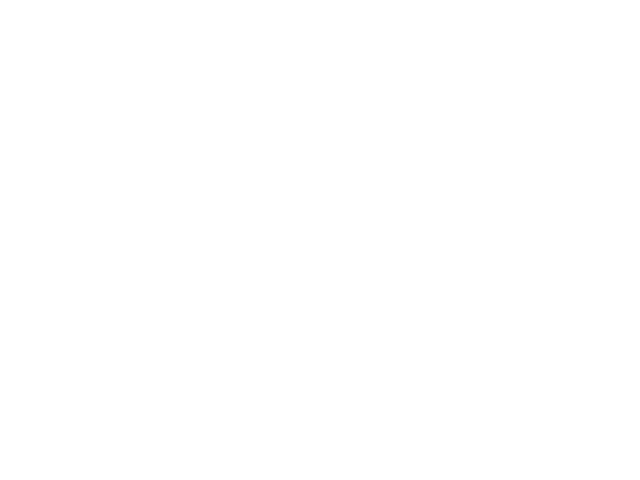

In [15]:
plt.figure()
plt.rcParams.update({'font.size': 12, 'lines.linewidth': 2})

def shape_functions(total_length, num_nodes, node_x):
    l = total_length / (num_nodes - 1)

    if node_x == 0:
        x = np.array([node_x, node_x + l])
        y = np.array([1.0, 0.0])
    elif node_x == total_length:
        x = np.array([node_x - l, node_x])
        y = np.array([0.0, 1.0])
    else:
        x = np.array([node_x - l, node_x, node_x + l])
        y = np.array([0.0, 1.0, 0.0])

    return x, y

def shape_functions_for_plot(num_nodes, beam_length = 15):

    x_positions = np.linspace(0, beam_length, num_nodes)

    data = {}

    for node_num, x_coords in enumerate(x_positions):

        x, y = shape_functions(beam_length, num_nodes, x_coords)
        data[node_num + 1] = {'x': x, 'y': y}

    return data

In [16]:
def linear_lagrange_shape_function(x, nodes_x_values, nodes_displacements):
    """
    Compute the linear Lagrange shape function for a given x.
    Args:
        x (float): The x-coordinate.
        x0 (float): Left node position.
        x1 (float): Right node position.
    Returns:
        float: The shape function value.
    """

    ratio = (x - nodes_x_values[0]) / (nodes_x_values[1] - nodes_x_values[0])

    return (1 - ratio) * nodes_displacements[0] + ratio * nodes_displacements[1]

def function(x):
    """
    Define the function to be plotted.
    Args:
        x (numpy.ndarray): Input values.
    Returns:
        numpy.ndarray: Corresponding function values.
    """
    return np.sin(x) * 0.14*x

def shape_functions_applied(num_elements):
    """
    Plot linear Lagrange shape functions on a beam.
    Args:
        num_elements (int): Number of elements (segments).
    """

    beam_length = 15

    num_nodes = num_elements + 1
    x_at_nodes = np.linspace(0, beam_length, num_nodes)

    y_at_nodes = function(x_at_nodes)

    x_data = np.linspace(0, beam_length, 1000)

    # Use NumPy to compute y_vals efficiently
    y_vals = np.zeros_like(x_data)

    for element_number in range(num_elements):
        mask = (x_at_nodes[element_number] <= x_data) & (x_data <= x_at_nodes[element_number + 1])
        y_vals[mask] = linear_lagrange_shape_function(x_data[mask], x_at_nodes[element_number:element_number + 2], y_at_nodes[element_number:element_number + 2])

    return x_data, function(x_data), y_vals


In [17]:
# Colors
grey = '#eeeeee'  # light grey fill

# Prepare all the graphs that are to be plotted
range_elements = np.concatenate((np.arange(1, 7, 1), np.arange(7, 35, 4), np.arange(35, 55, 8)))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Shape functions", "Exact and approximated solution"))

base_traces_left = 2  # Number of traces in the left plot that are always visible
base_traces_right = 0  # Number of traces in the right plot that are always visible

# Add traces to the subplots
x_data, y_data, y_vals = shape_functions_applied(10)

# Add left plot traces (Cumulative Influx and Cumulative Outflux)
fig.add_trace(
    go.Scatter(
        visible=True,  # Show for the first value of a
        x=x_data,
        y=y_data,
        # line=dict(color='#6a8ba4'),
        mode='lines',
        name='Exact solution'
    ),
    row=1,
    col=2
)


# Add traces to the subplots
for a in range_elements:

    x_data, y_data, y_vals = shape_functions_applied(a)

    fig.add_trace(
        go.Scatter(
            visible = True if a == range_elements[0] else False,  # Show for the first value of a
            x=x_data,
            y=y_vals,
            # line=dict(color='#FFA500'),
            mode='lines',
            name='Numerical solution'
        ),
        row=1,
        col=2
    )


# Add traces to the subplots
for a in range_elements:

    data = shape_functions_for_plot(a + 1)

    for i in range(1, a + 2):

        info = data[i]
        x, y = info['x'], info['y']

        # Add right plot traces (Cumulative Outflux for each 'a' value)
        fig.add_trace(
            go.Scatter(
                visible = True if a == range_elements[0] else False,
                x=x,
                y=y,
                mode='lines',
                name=f'Node shape for node {i}'
            ),
            row=1,
            col=1
        )

# Create and add slider
steps = []
for i in range(0, range_elements.shape[0]):

    a = range_elements[i]
    visarray = [False] * len(fig.data)

    visarray[0] = True
    visarray[i + 1] = True

    start_of_second_plot = 1 + len(range_elements)

    if i==0:
        start_index=start_of_second_plot
    else:
        start_index = start_of_second_plot + np.sum(range_elements[0:i]) + i

    num_lines = range_elements[i] + 1
    end_index = start_index + num_lines

    visarray[start_index:end_index] = [True] * (end_index - start_index)
    
    step = dict(
        method="update",
        args=[{"visible": visarray}],
        label=str(round(range_elements[i], 1))
    )
    steps.append(step)

sliders = [dict(
    active=0,  # Show the first value of 'a' initially
    currentvalue={"prefix": r"Number of elements: "},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    title="Applying shape functions",
    legend_title="Legend",
    legend=dict(
        x=1.05,  # Adjust the legend position
        y=0.5
    )
)

fig.update_xaxes(title_text='x', row=1, col=1, range=[x_data[0], x_data[-1]])
fig.update_xaxes(title_text='x', row=1, col=2, range=[x_data[0], x_data[-1]])

# Update y-axis properties
fig.update_yaxes(title_text='Node shape value', row=1, col=1, range=[-0.1, 1.1])
fig.update_yaxes(title_text='y', row=1, col=2, range=[-2.1, 2.1])

fig.show()